# Import Library and packages

In [25]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling
import collections
from sklearn import metrics
from sklearn import tree
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
import graphviz

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

# Import white wine data set from url

In [3]:
data=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

# understand the features , missing values,type of characters,percentile, mean, std, Quartiles, min, max

In [4]:
data.head()
data.tail()
data.info()
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


# Correlation matrix, Heat map

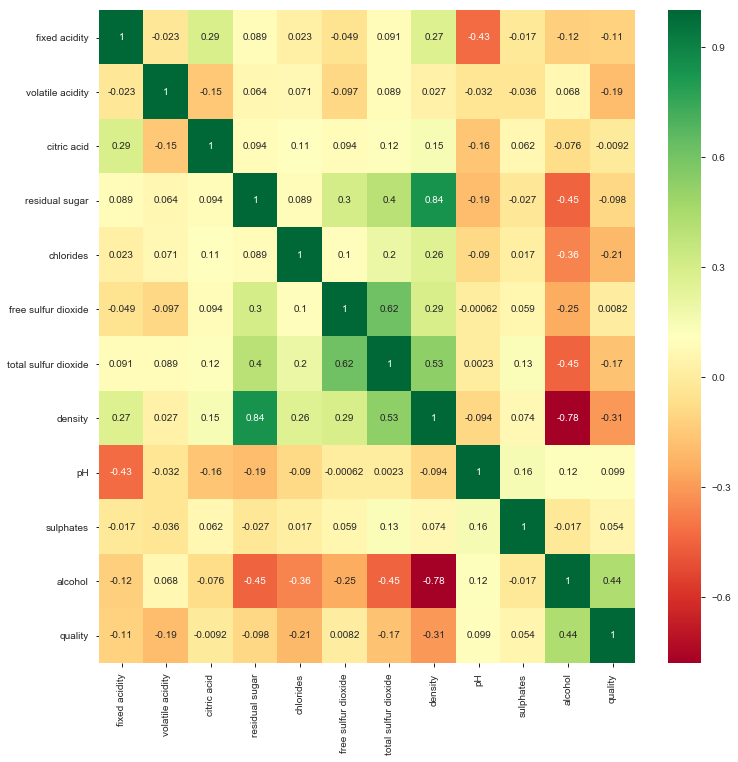

In [5]:
x=data.corr()
plt.subplots(figsize=(12,12))
sns.heatmap(x,cmap='RdYlGn',annot=True)
plt.show();

# Segergating X(without quality) and Y (quality)

In [6]:
y=data.quality
x=data.drop('quality',axis=1)
y.head()
x.head()

0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


# Exploratory data analytics

In [7]:
eda_report=pandas_profiling.ProfileReport(data)
eda_report.to_file("whitewine_Randomforest_EDA_report.html")

# split the data to train and test - 70% and 30%

In [8]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=1)
train_x.shape
train_y.shape
test_x.shape
test_y.shape

(3428, 11)

(3428,)

(1470, 11)

(1470,)

 # standard scaler function - The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1. This will normalize the features (each column of X, INDIVIDUALLY !!!) so that each column/feature/variable will have mean = 0 and standard deviation = 1

In [9]:
from sklearn. preprocessing import StandardScaler 
sc=StandardScaler()
arr_scld= sc.fit_transform(train_x)
train_xsc=pd.DataFrame(arr_scld,columns=train_x.columns)
sc
arr_scld
train_xsc

StandardScaler(copy=True, with_mean=True, with_std=True)

array([[-1.02197492, -0.47290295,  0.04594479, ...,  1.15256496,
        -1.06766508,  1.81506047],
       [ 2.33376259, -0.86537634, -0.28149545, ..., -1.62400482,
        -0.18793143,  0.58396236],
       [-0.18304055, -0.47290295, -0.03591527, ..., -0.50015514,
         0.25193539, -0.31884292],
       ...,
       [ 1.85437152, -0.86537634,  0.70082528, ..., -0.83069917,
         1.39558913,  0.50188915],
       [-0.90212716, -0.5710213 , -0.69079575, ...,  0.1609329 ,
        -0.80374498,  0.17359633],
       [ 0.4161983 , -0.47290295,  0.37338504, ..., -0.63237275,
        -0.45185152, -1.2216482 ]])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-1.021975,-0.472903,0.045945,-1.003121,-0.981663,-0.718522,-0.642333,-1.479321,1.152565,-1.067665,1.815060
1,2.333763,-0.865376,-0.281495,-0.274260,-0.839267,-0.081570,-0.431802,-0.542720,-1.624005,-0.187931,0.583962
2,-0.183041,-0.472903,-0.035915,0.336408,0.110037,0.555382,0.878166,0.223893,-0.500155,0.251935,-0.318843
3,0.296351,1.391346,-1.100096,-0.707637,-0.364615,-0.428998,-0.689117,-1.455989,0.293151,-0.187931,2.389573
4,0.536046,-0.767258,0.455245,-0.806131,0.110037,-0.660617,-1.203748,-1.202673,-1.624005,-1.243612,1.240548
5,-0.542584,0.213925,-0.035915,-0.234862,0.204967,-0.313189,-0.034133,-0.336068,0.491477,0.779776,0.501889
6,0.416198,-0.472903,-0.117775,0.415204,0.584689,0.671191,1.112089,0.517205,0.028715,-0.803745,-0.482989
7,-0.302888,-0.571021,-0.854516,2.148711,0.062572,0.092144,-0.478587,1.670457,-0.698482,-0.275905,-1.385795
8,2.213915,0.213925,2.092446,-0.924325,0.015106,-1.471283,-1.601417,-0.106084,-0.830699,0.603829,0.255670
9,0.176503,-0.080430,0.209665,2.818476,-0.032359,0.555382,0.737813,2.317079,-1.227352,-0.363878,-1.385795


# Rename columns to remove space from column name

In [10]:
data.columns = ['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol','quality']

  # Explore dataset again

In [11]:
y=data.quality
x=data.drop('quality',axis=1)
y.head()
x.head()

0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [12]:
data.groupby('quality').size()

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
dtype: int64

# Create categorical bins(binning)

In [13]:
bins=(2,5,6,9)
names=[1,2,3]
data['quality_type']=pd.cut(data['quality'],bins=bins,labels=names)

# Show Bins

In [14]:
data.groupby('quality_type').size()

quality_type
1    1640
2    2198
3    1060
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
fixed_acidity           4898 non-null float64
volatile_acidity        4898 non-null float64
citric_acid             4898 non-null float64
residual_sugar          4898 non-null float64
chlorides               4898 non-null float64
free_sulfur_dioxide     4898 non-null float64
total_sulfur_dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
quality_type            4898 non-null category
dtypes: category(1), float64(11), int64(1)
memory usage: 464.2 KB


# convert quality type from categorical to numerical

In [16]:
data['quality_type']=pd.to_numeric(data['quality_type'])

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
fixed_acidity           4898 non-null float64
volatile_acidity        4898 non-null float64
citric_acid             4898 non-null float64
residual_sugar          4898 non-null float64
chlorides               4898 non-null float64
free_sulfur_dioxide     4898 non-null float64
total_sulfur_dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
quality_type            4898 non-null int64
dtypes: float64(11), int64(2)
memory usage: 497.5 KB


# Random seed function 

In [19]:
import random
random.seed(1234)

# Create Random forest model and set hyper parameters

In [20]:
n_estimators = [10,500,1000,2000]
criterion = ['gini','entropy']
min_samples_split = [2,10,20,50,100]
max_depth = [20,30,40,50,None]

# Model training using Randomize search and cross validation

In [27]:
param_grid={'n_estimators': n_estimators,'criterion':criterion,'min_samples_split':min_samples_split,'max_depth':max_depth}
rf=RandomForestClassifier()
rf_g=RandomizedSearchCV(rf,param_grid,cv=5,verbose=2,n_jobs=-1)
rf_g.fit(train_x,train_y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   56.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.7min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [10, 500, 1000, 2000], 'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 10, 20, 50, 100], 'max_depth': [20, 30, 40, 50, None]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

# Best setting of the hyper parameters 

In [29]:
rf_g.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Best Accuracy score using the above parameters

In [30]:
rf_g.best_score_

0.6505250875145857

# out of the 10 models built , the best model is sitting at the below index locaition

In [31]:
rf_g.best_index_

6

# Visulaize all 10 models

In [34]:
cv = pd.DataFrame(rf_g.cv_results_)
cv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_depth,param_criterion,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,7.683066,0.108249,0.226897,0.014601,500,50,None,entropy,"{'n_estimators': 500, 'min_samples_split': 50,...",0.601744,...,0.572345,0.018557,8,0.659854,0.667275,0.671772,0.670798,0.671886,0.668317,0.004551
1,0.128355,0.055564,0.009587,0.006489,10,50,None,entropy,"{'n_estimators': 10, 'min_samples_split': 50, ...",0.595930,...,0.566219,0.016643,9,0.652920,0.652682,0.653538,0.655487,0.644210,0.651767,0.003905
2,6.623156,0.227982,0.206924,0.013464,500,100,50,entropy,"{'n_estimators': 500, 'min_samples_split': 100...",0.579942,...,0.560385,0.011727,10,0.598175,0.607443,0.604303,0.618301,0.617626,0.609170,0.007777
3,32.816184,0.684178,3.443401,0.235718,2000,10,50,gini,"{'n_estimators': 2000, 'min_samples_split': 10...",0.654070,...,0.630688,0.014709,3,0.939416,0.933236,0.939096,0.930004,0.934450,0.935240,0.003588
4,0.169374,0.023238,0.009588,0.001956,10,2,40,gini,"{'n_estimators': 10, 'min_samples_split': 2, '...",0.626453,...,0.605893,0.018327,7,0.986496,0.988325,0.987236,0.989428,0.987618,0.987821,0.000997
5,16.333591,0.911387,0.619173,0.068215,1000,2,None,gini,"{'n_estimators': 1000, 'min_samples_split': 2,...",0.672965,...,0.646733,0.016604,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
6,27.773054,1.485298,0.629662,0.058656,1000,2,None,entropy,"{'n_estimators': 1000, 'min_samples_split': 2,...",0.687500,...,0.650525,0.022328,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,10.991545,0.628543,0.265349,0.020238,500,20,50,entropy,"{'n_estimators': 500, 'min_samples_split': 20,...",0.633721,...,0.606768,0.016672,6,0.803285,0.803721,0.808534,0.798031,0.807356,0.804185,0.003684
8,45.493241,1.318298,1.045631,0.109257,2000,20,50,entropy,"{'n_estimators': 2000, 'min_samples_split': 20...",0.633721,...,0.607351,0.018043,5,0.800000,0.804451,0.806710,0.797302,0.805171,0.802727,0.003512
9,45.646524,6.900595,2.575769,0.191374,2000,10,40,entropy,"{'n_estimators': 2000, 'min_samples_split': 10...",0.651163,...,0.629813,0.014567,4,0.938686,0.931777,0.939096,0.931826,0.935543,0.935385,0.003174


# Make predictions using the best model

In [35]:
predicted=rf_g.predict(test_x)

# Accuracy score on the test data

In [36]:
metrics.accuracy_score(predicted,test_y)

0.6714285714285714

# Precision and Recall on the test data

In [37]:
print(metrics.classification_report(predicted,test_y))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.18      0.50      0.26        14
           5       0.64      0.72      0.68       391
           6       0.82      0.63      0.71       853
           7       0.51      0.75      0.61       195
           8       0.31      0.88      0.46        17

   micro avg       0.67      0.67      0.67      1470
   macro avg       0.41      0.58      0.45      1470
weighted avg       0.72      0.67      0.68      1470



# Confusion matrix on the test data

<Figure size 576x576 with 0 Axes>

Confusion Matrix


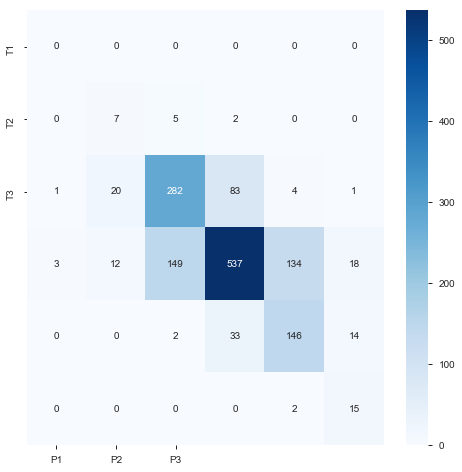

In [40]:
plt.figure(figsize=(8,8))
print('Confusion Matrix')
cf=metrics.confusion_matrix(predicted,test_y)
lbl1=["P1","P2","P3"]
lbl2=["T1","T2","T3"]
sns.heatmap(cf,annot=True,cmap ="Blues",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show()

# Decision tree

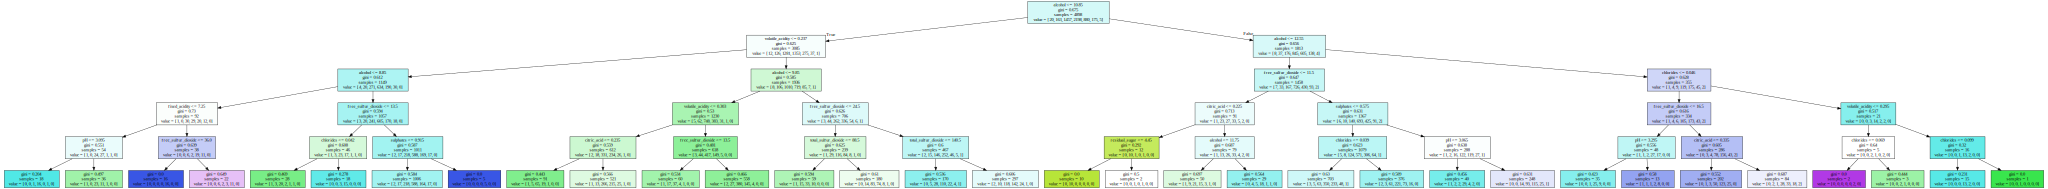

In [41]:
import graphviz
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(x,y)
with open('tree.dot','w') as dotfile:
    tree.export_graphviz(clf,out_file=dotfile,feature_names=x.columns,filled=True)
    dotfile.close()
    
from graphviz import Source
with open('tree.dot','r') as f:
    text=f.read()
    plot=Source(text)
plot

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn .model_selection import cross_val_score

clf_knn = KNeighborsClassifier(n_neighbors=10)
clf_knn = clf_knn.fit(train_x,train_y)
clf_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [68]:
list_k=[3,5,7,9,11,13,15,20]

for k in list_k:
    clf_knn=KNeighborsClassifier(n_neighbors=k)
    score_knn=cross_val_score(clf_knn,test_x,test_y,cv=5)
    print("k:",k)
    print("cross validation score:"+str(score_knn))
    print("cross validation mean score:"+str(score_knn.mean()))

k: 3
cross validation score:[0.40878378 0.4440678  0.4440678  0.44368601 0.41924399]
cross validation mean score:0.43196987401687137
k: 5
cross validation score:[0.41554054 0.44745763 0.42711864 0.43003413 0.43986254]
cross validation mean score:0.432002696875028
k: 7
cross validation score:[0.41216216 0.4440678  0.42711864 0.45392491 0.41237113]
cross validation mean score:0.4299289303073029
k: 9
cross validation score:[0.4527027  0.41016949 0.42711864 0.41638225 0.41237113]
cross validation mean score:0.42374884497525367
k: 11
cross validation score:[0.42567568 0.40677966 0.39322034 0.40955631 0.41237113]
cross validation mean score:0.40952062473789363
k: 13
cross validation score:[0.4222973  0.40677966 0.43389831 0.43003413 0.43298969]
cross validation mean score:0.4251998167626949
k: 15
cross validation score:[0.42905405 0.42372881 0.40677966 0.40955631 0.42955326]
cross validation mean score:0.419734421445662
k: 20
cross validation score:[0.44932432 0.45084746 0.42372881 0.4368600